In [102]:
import pandas as pd
import numpy as np
import tensorflow as tf

from datetime import datetime, timedelta

import sklearn
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

# DATA PREPROCESSING

In [103]:

df = pd.read_csv('D:\Mobadra data analysis\Project\Superstore Sales Dataset.csv')



In [104]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [106]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [107]:
# Check for missing values in each column
missing_data = df.isnull().sum()

# Display columns with missing values only
missing_data[missing_data > 0]


Postal Code    11
dtype: int64

In [108]:
# Display the distribution of categorical columns
df['Ship Mode'].value_counts()
df['Segment'].value_counts()
df['Category'].value_counts()
df['Sub-Category'].value_counts()


Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64

In [109]:
# 1. Date Conversion
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y', errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y', errors='coerce')

In [110]:
df['Order Date'].dt.year.unique()

array([2017, 2016, 2015, 2018])

In [111]:
# Select numerical columns
numerical = df.select_dtypes(include='number')

# Loop through each numerical column and use the describe function
for column in numerical.columns:
    print(f"Column: {column}"'\n')
    print(numerical[column].describe())
    print("-" * 50)


Column: Row ID

count    9800.000000
mean     4900.500000
std      2829.160653
min         1.000000
25%      2450.750000
50%      4900.500000
75%      7350.250000
max      9800.000000
Name: Row ID, dtype: float64
--------------------------------------------------
Column: Postal Code

count     9789.000000
mean     55273.322403
std      32041.223413
min       1040.000000
25%      23223.000000
50%      58103.000000
75%      90008.000000
max      99301.000000
Name: Postal Code, dtype: float64
--------------------------------------------------
Column: Sales

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64
--------------------------------------------------


In [112]:

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)



In [113]:
continuous_cols = [col for col in numerical if df[col].nunique() > 2]
print(df[continuous_cols].dtypes)


Row ID           int64
Postal Code    float64
Sales          float64
dtype: object


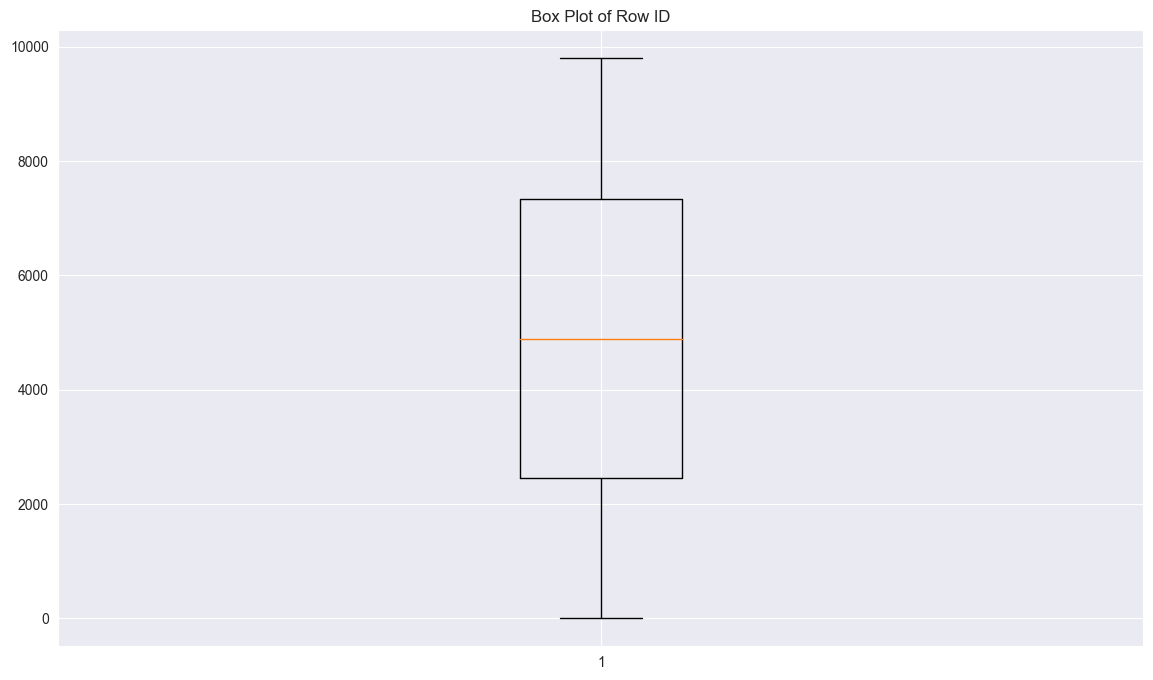

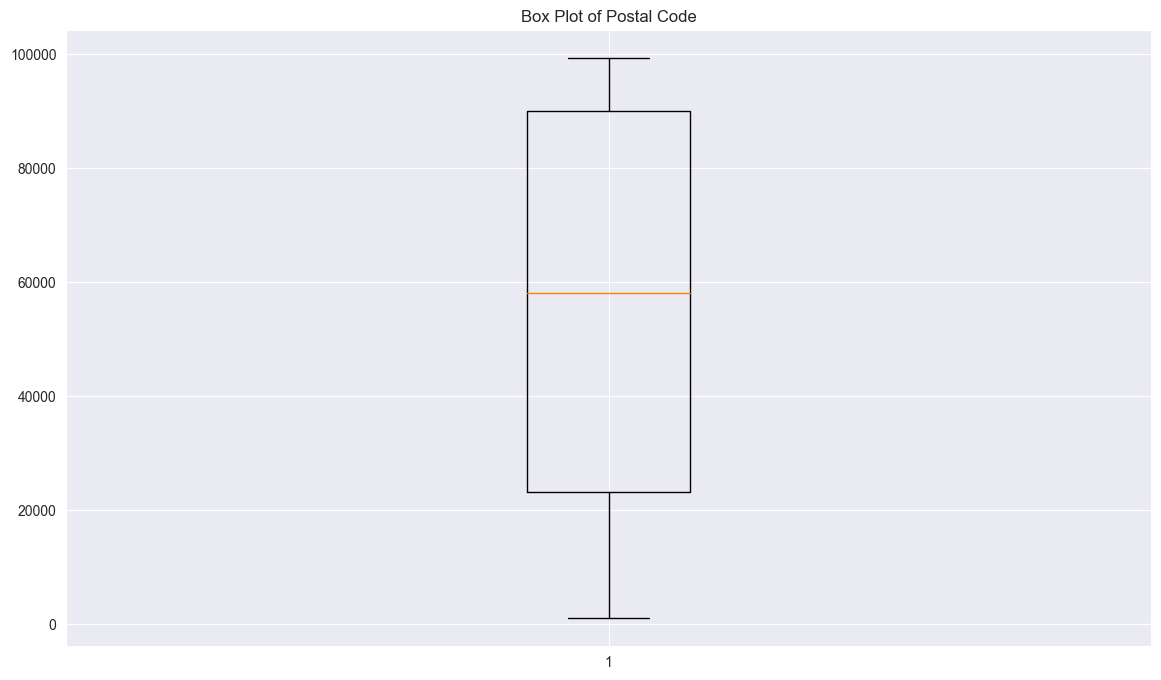

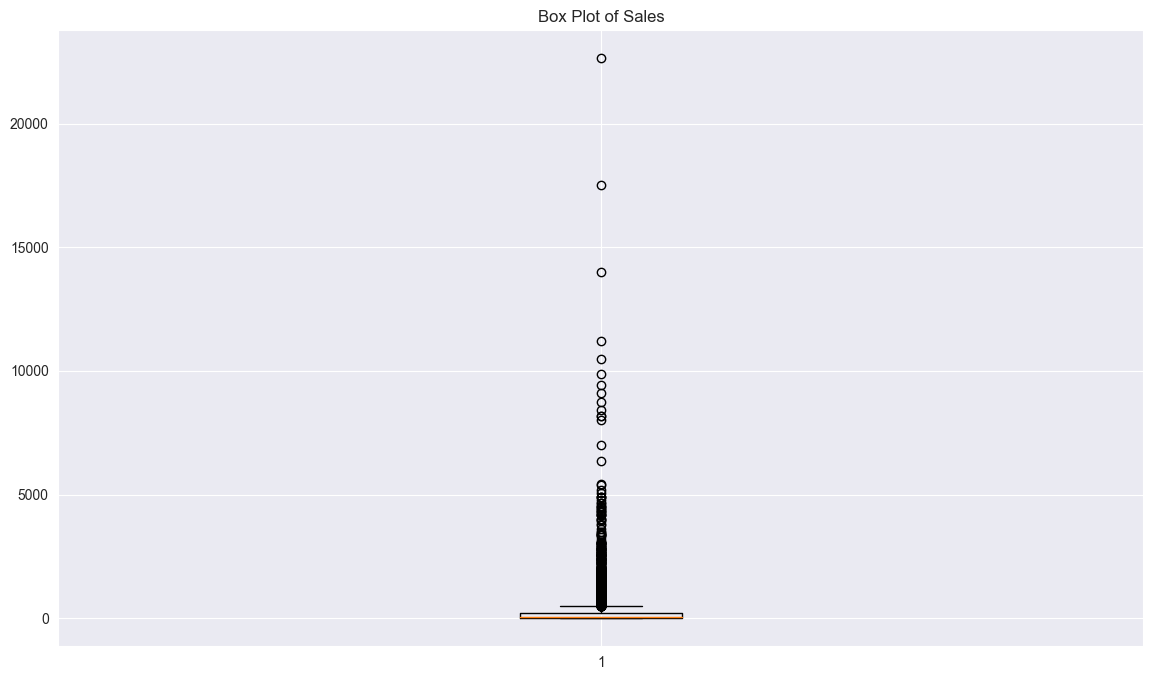

In [114]:
# Select only the numeric columns (continuous data) with more than 2 unique values
continuous_cols = [col for col in numerical if df[col].nunique() > 2]

# Loop through each continuous column and create a box plot
for column in continuous_cols:
    plt.figure()
    plt.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [115]:
Q1 = df['Sales'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['Sales'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1                   # Interquartile range

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [116]:
df['Sales'] = np.where(df['Sales'] < lower_bound, lower_bound, df['Sales'])
df['Sales'] = np.where(df['Sales'] > upper_bound, upper_bound, df['Sales'])


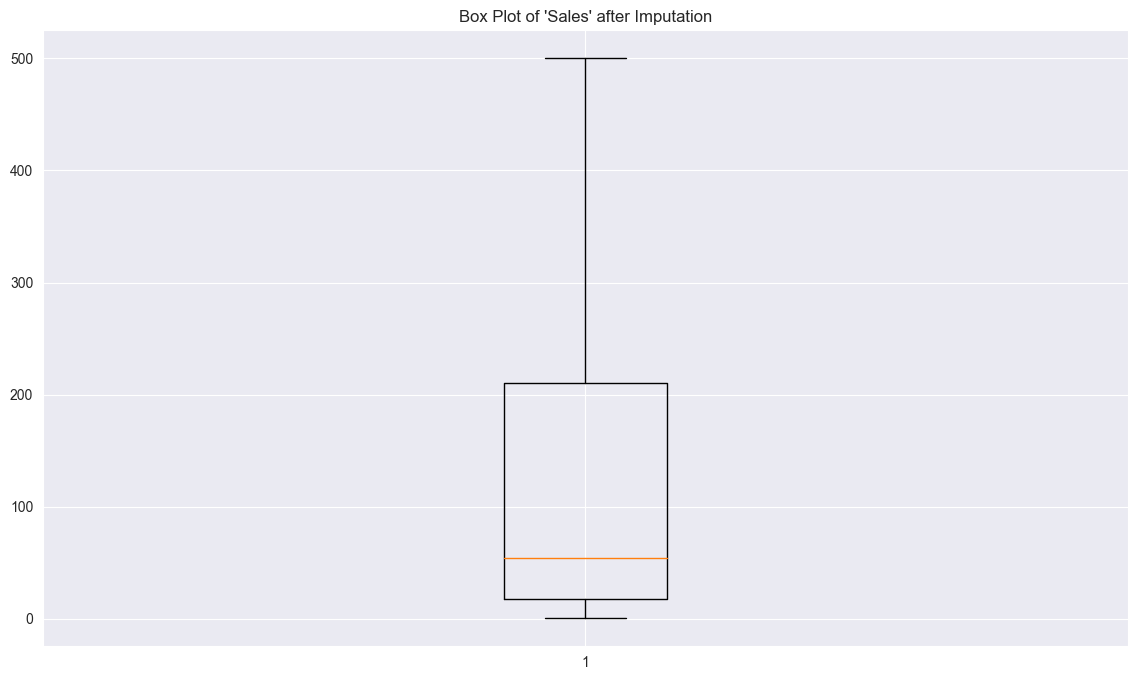

In [117]:
plt.figure()
plt.boxplot(df['Sales'])
plt.title(f"Box Plot of 'Sales' after Imputation")  
plt.show()



In [118]:
df.shape

(9789, 18)

               Row ID  Postal Code     Sales
Row ID       1.000000     0.013645  0.001151
Postal Code  0.013645     1.000000 -0.024067
Sales        0.001151    -0.024067  1.000000


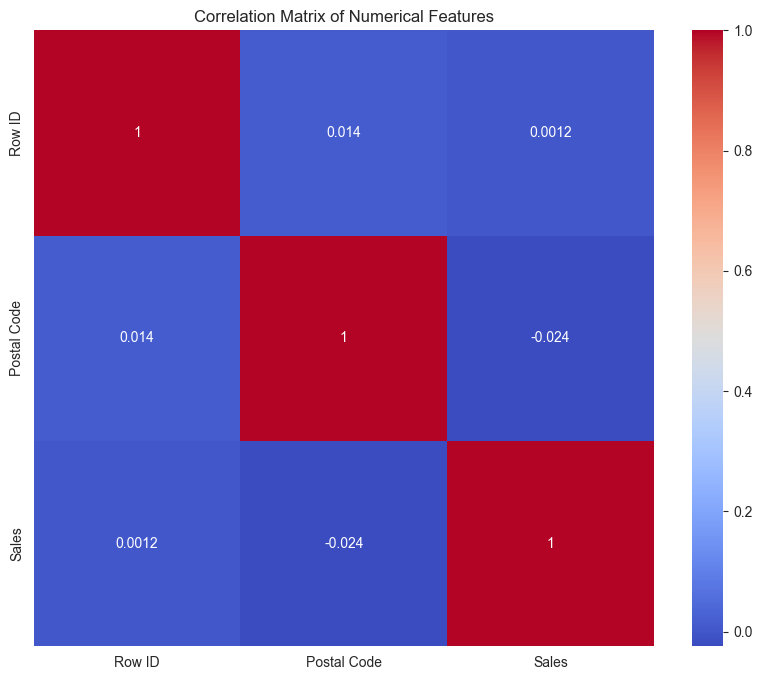

In [119]:


# Compute the correlation matrix for the numerical columns
correlation_matrix = numerical.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# EDA

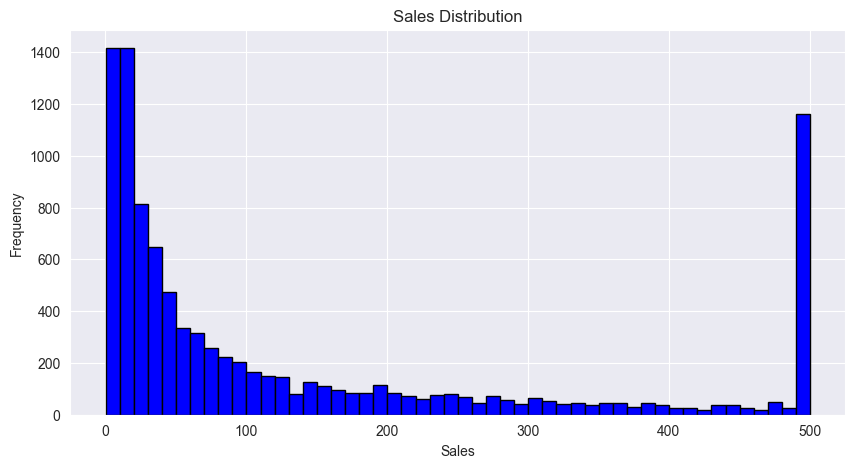

In [120]:
# Plot a histogram of the Sales column to understand the distribution
plt.figure(figsize=(10, 5))
plt.hist(df['Sales'], bins=50, color='blue', edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


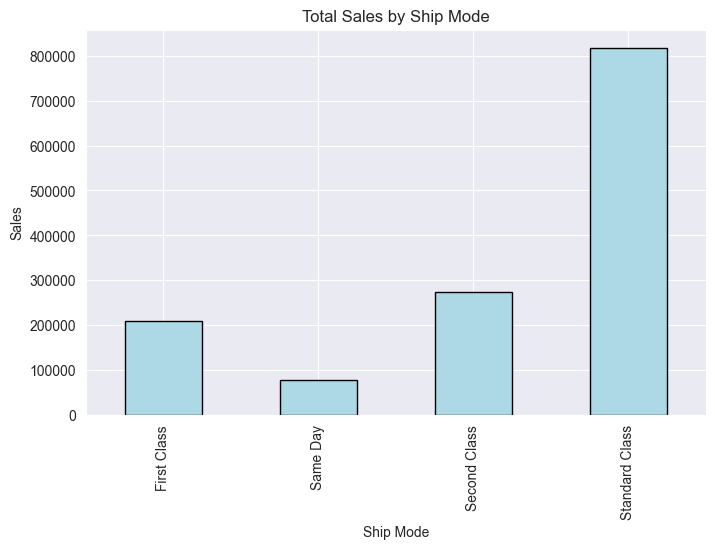

In [121]:
# Group the data by Ship Mode and sum the Sales
ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum()

# Plot sales by shipping mode
ship_mode_sales.plot(kind='bar', figsize=(8, 5), color='lightblue', edgecolor='black')
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.show()


# MODELLING

In [122]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


In [123]:
print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Ca

In [124]:
# Huber loss function
def huber_loss(y_pred, y, delta=1.0):
    huber_mse = 0.5 * (y - y_pred) ** 2
    huber_mae = delta * (np.abs(y - y_pred) - 0.5 * delta)
    return np.where(np.abs(y - y_pred) <= delta, huber_mse, huber_mae)

In [125]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Check for Invalid Dates
if df['Order Date'].isna().any():
    print("Warning: Some 'Order Date' values are invalid or could not be converted.")

if df['Ship Date'].isna().any():
    print("Warning: Some 'Ship Date' values are invalid or could not be converted.")

# 3. Set 'Order Date' as the index
df.set_index('Order Date', inplace=True)

# 4. Verify the Index Type
if isinstance(df.index, pd.DatetimeIndex):
    print("Index is a DatetimeIndex.")
else:
    print("Index is not a DatetimeIndex. Current type:", type(df.index))



Index is a DatetimeIndex.


In [127]:
df.index

DatetimeIndex(['2017-11-08', '2017-11-08', '2017-06-12', '2016-10-11',
               '2016-10-11', '2015-06-09', '2015-06-09', '2015-06-09',
               '2015-06-09', '2015-06-09',
               ...
               '2018-03-27', '2015-05-21', '2015-05-21', '2015-05-21',
               '2015-05-21', '2017-05-21', '2016-01-12', '2016-01-12',
               '2016-01-12', '2016-01-12'],
              dtype='datetime64[ns]', name='Order Date', length=9789, freq=None)

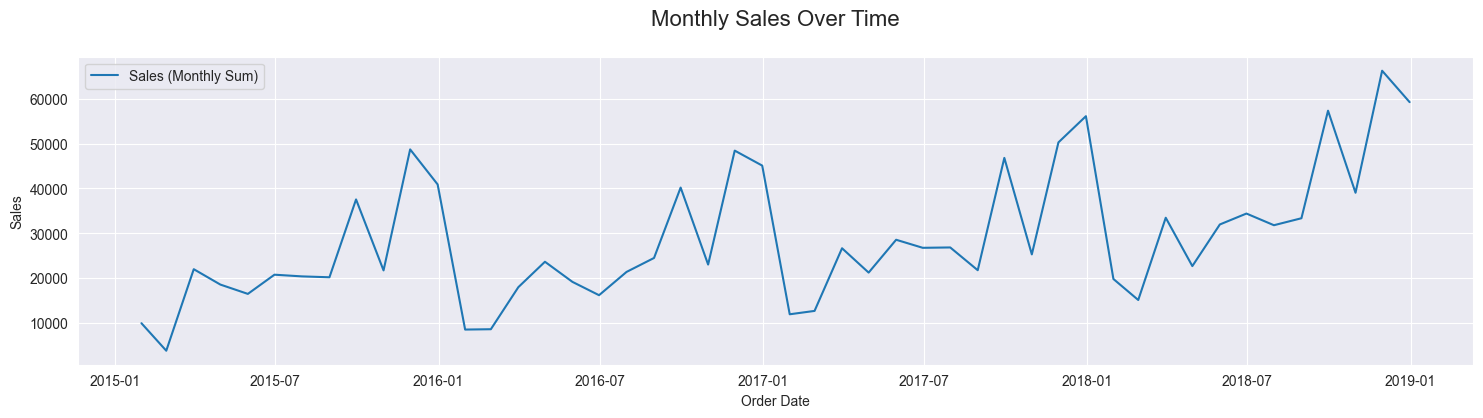

In [128]:
# 5. Resample the data by month and sum the sales
df_resampled = df.resample('M').sum(numeric_only=True)

# 6. Plot the resampled data
plt.figure(figsize=(18, 4))
plt.plot(df_resampled.index, df_resampled['Sales'], label='Sales (Monthly Sum)')
plt.legend(loc='best')
plt.title('Monthly Sales Over Time\n', fontdict={'fontsize': 16, 'fontweight': 5})
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

In [129]:
df_resampled.columns

Index(['Row ID', 'Postal Code', 'Sales'], dtype='object')



### **Additive seasonal decomposition**





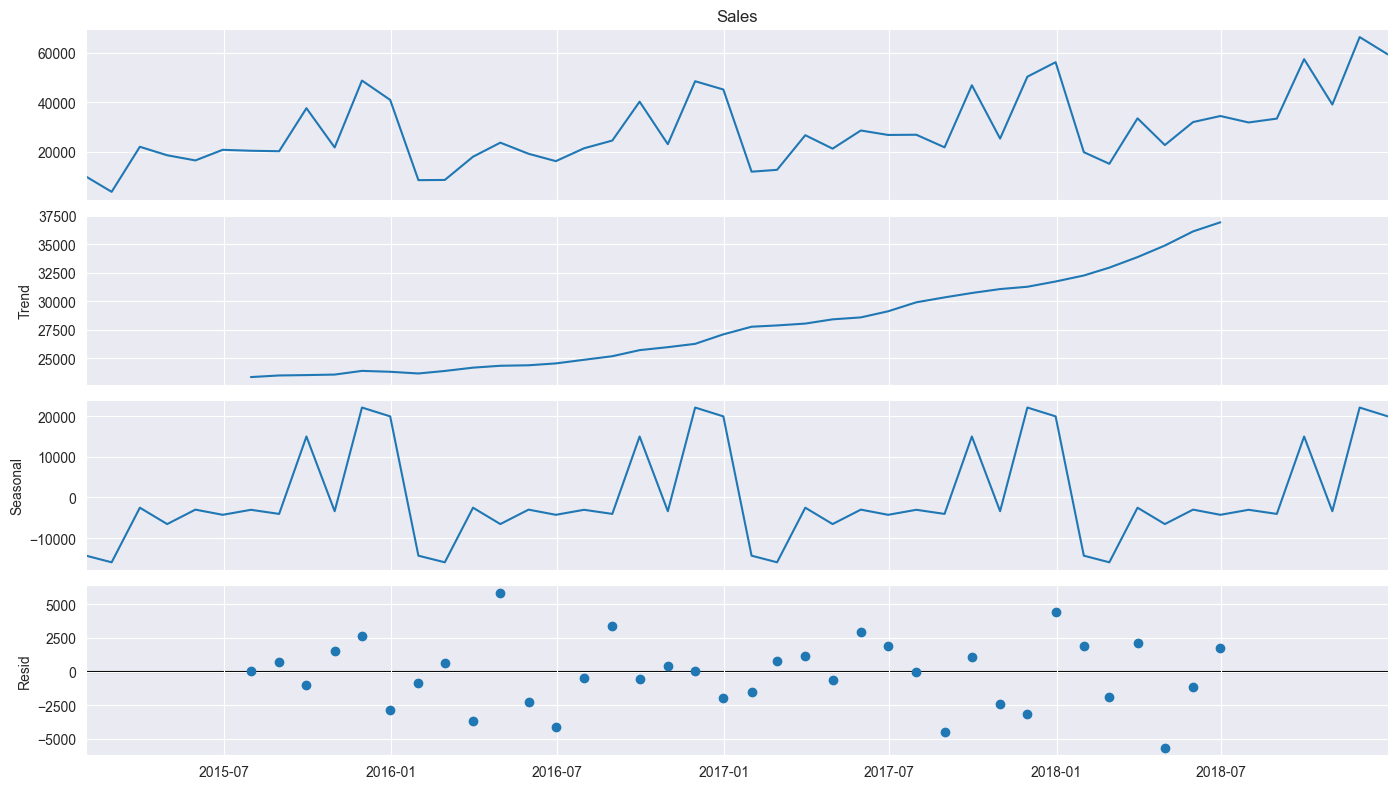

In [130]:
import pandas as pd
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = (14, 8)

# Perform seasonal decomposition with 'Sales'
decomposition = sm.tsa.seasonal_decompose(df_resampled['Sales'], model='additive', period=12)

# Plot the decomposition components
fig = decomposition.plot()
plt.show()



### **Multiplicative seasonal decomposition**


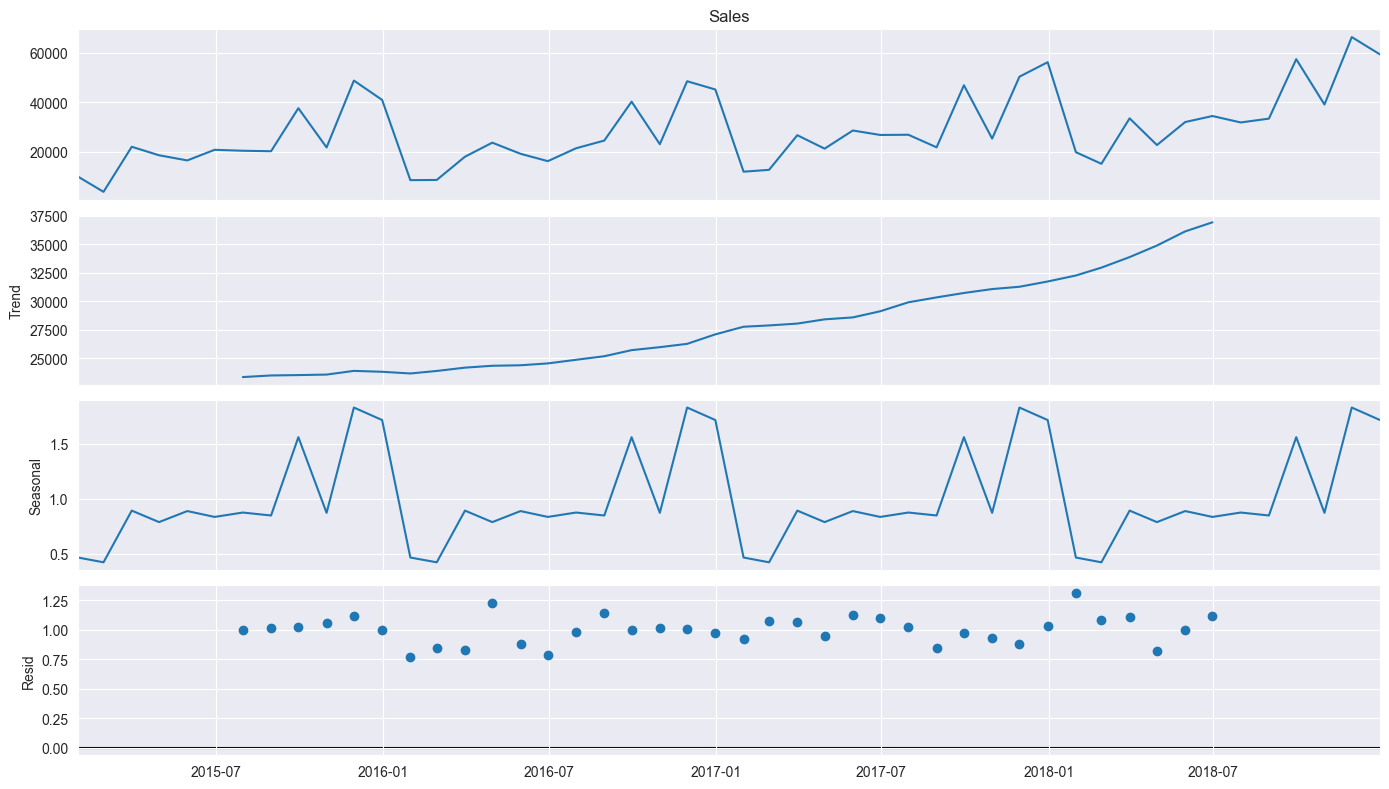

In [131]:
decomposition = sm.tsa.seasonal_decompose(df_resampled['Sales'], model='multiplicative')
fig = decomposition.plot()
plt.show()

>Trend: The long-term pattern of the data.

>Seasonal: The repeating patterns that occur within a specific time period.

>Residual: The remaining component after removing the trend and seasonal components.

**Check Stationary**

     Augmented Dickey-Fuller (ADF) test

In [132]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df_resampled['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])


ADF Statistic: -4.028622
Critical Values @ 0.05: -2.93
p-value: 0.001268


Since the ADF statistic is much less than the critical value and the p-value is extremely low, you can reject the null hypothesis. This means that there is strong evidence to conclude that the Sales time series is stationary.
>Implications:
Stationarity is an important property for many time series analyses, including ARIMA modeling and seasonal decomposition. If your data is stationary, it implies that the statistical properties (mean, variance, autocorrelation) of the series do not change over time, making it more suitable for forecasting and analysis.

# Check ACF & PACF


In [133]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [134]:
# Visualizations
lag_acf = 20
lag_pacf = 20

In [135]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df_resampled['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])


ADF Statistic: -4.028622
Critical Values @ 0.05: -2.93
p-value: 0.001268


Autocorrelation Function (ACF)
Purpose:
Measure Correlation: ACF measures the correlation between a time series and its lagged values. It shows how observations in a time series are correlated with past values.
Identify Seasonality: It helps in identifying seasonal patterns in the data, as peaks in the ACF plot can indicate significant correlations at specific lags.
Determine Model Type: ACF is used to help identify whether to use an AR (Autoregressive), MA (Moving Average), or ARMA (Autoregressive Moving Average) model for forecasting.

Partial Autocorrelation Function (PACF)
Purpose:
Measure Partial Correlation: PACF measures the correlation between a time series and its lagged values while controlling for the effects of intermediate lags. This means it isolates the effect of a specific lag on the current observation.
Determine AR Order: PACF is primarily used to identify the order of the AR (Autoregressive) part of an ARMA model. It helps in determining how many past values should be included in the model.

> You can conclude that your time series data (Sales) is stationary. This means that the statistical properties of the series, such as mean and variance, do not change over time.

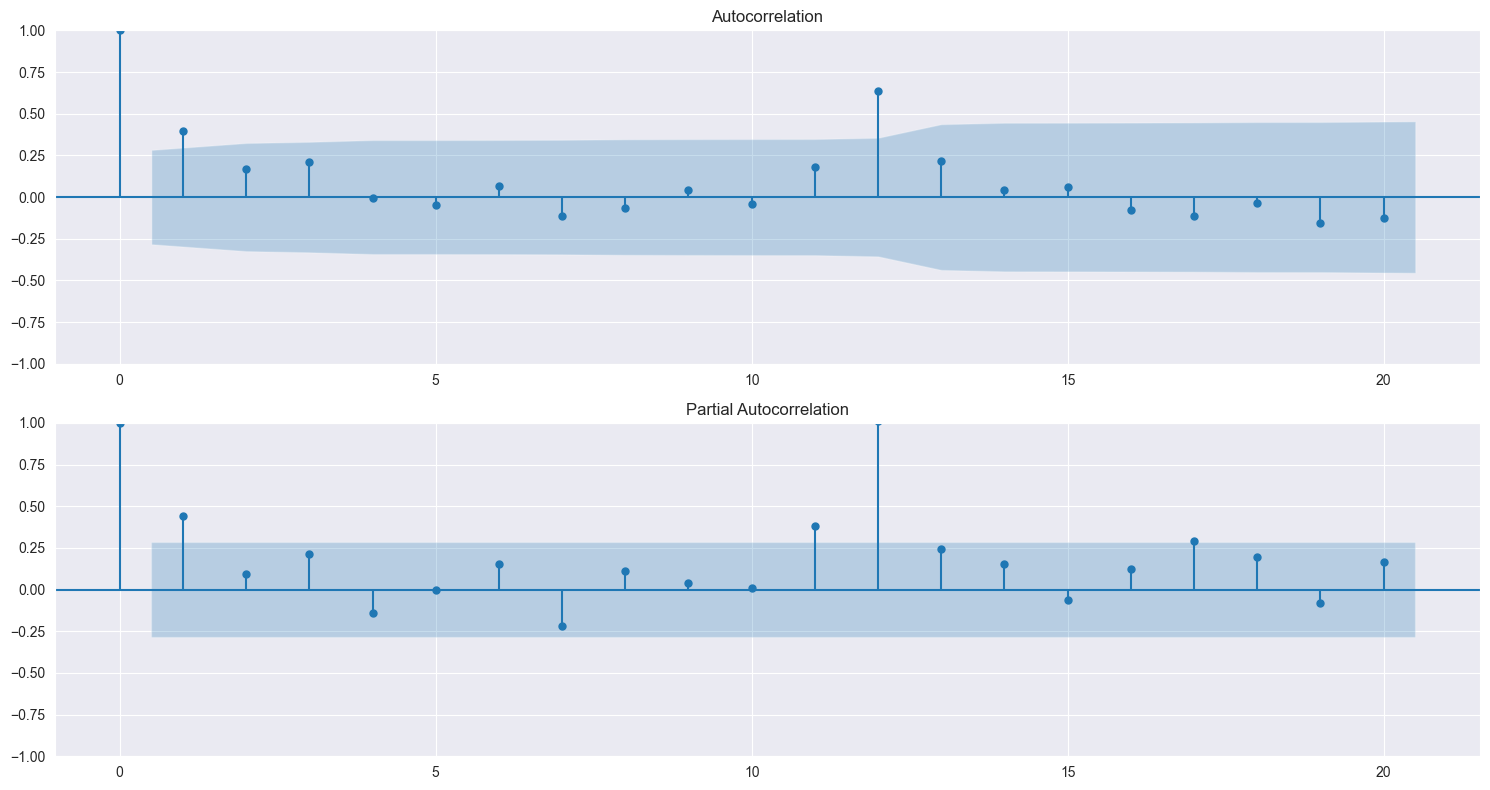

In [136]:
# Draw ACF and PACF plots
data_column = df_resampled['Sales']
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))

plot_acf(data_column, lags=lag_acf, ax=ax[0])
plot_pacf(data_column, lags=lag_pacf, ax=ax[1], method='ols')




plt.tight_layout()
plt.show()


Since the series is stationary, you would expect the ACF and PACF to decay quickly. If both are close to zero, this suggests that the series does not have a trend or seasonal pattern.
The time series does not exhibit any significant autocorrelation, meaning past values do not provide useful information about future values. This often suggests that the series is stationary or has been transformed to remove trends and seasonality.

In [137]:
if df_resampled.index.is_monotonic_increasing:
    print("Dates are sorted in ascending order.")
else:
    print("Dates are not sorted in ascending order.")

Dates are sorted in ascending order.


# AR model

Sales    0
dtype: int64
ADF Statistic: -6.320988845828045
p-value: 3.066575862128045e-08
Critical Values: {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}


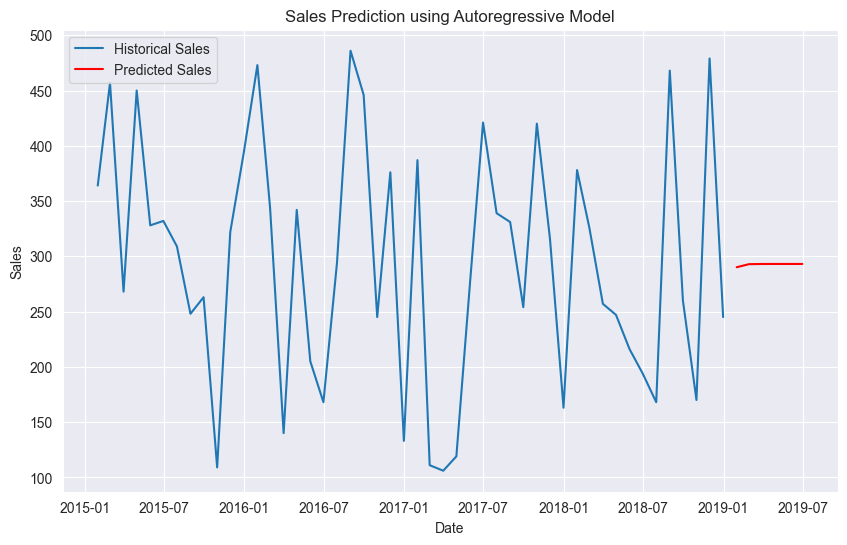

Mean Absolute Error (MAE): 89.00188051759636
Mean Squared Error (MSE): 11158.953992590017
Root Mean Squared Error (RMSE): 105.63595028488179
Mean Absolute Percentage Error (MAPE): 25.431867659734227%


In [138]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Load your sales data
# Replace this with your actual sales data
data = {
    'Order Date': pd.date_range(start='2015-01-01', end='2018-12-31', freq='M'),
    'Sales': np.random.randint(100, 500, size=48)  # Example sales data
}
sales_data = pd.DataFrame(data)

# Set 'Order Date' as the index
sales_data.set_index('Order Date', inplace=True)

# Check for missing values
print(sales_data.isnull().sum())

# Check for stationarity
result = adfuller(sales_data['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# If the series is non-stationary, consider differencing
if result[1] > 0.05:  # Non-stationary
    sales_data['Sales'] = sales_data['Sales'].diff().dropna()

# Fit the AR model
model = AutoReg(sales_data['Sales'].dropna(), lags=1)  # You can adjust the lags as needed
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(sales_data), end=len(sales_data) + 5)  # Forecast for the next 6 months

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sales_data['Sales'], label='Historical Sales')
plt.plot(predictions, label='Predicted Sales', color='red')
plt.title('Sales Prediction using Autoregressive Model')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Evaluation metrics
# Assuming you have actual future sales data for the evaluation
# Replace with your actual future sales data for MAPE calculation
actual_future_sales = np.random.randint(100, 500, size=6)  # Example actual future sales data
mae = np.mean(np.abs(predictions - actual_future_sales))
mse = np.mean((predictions - actual_future_sales) ** 2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((predictions - actual_future_sales) / actual_future_sales)) * 100

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


In [139]:
predictions

2019-01-31    290.113865
2019-02-28    292.886654
2019-03-31    293.057075
2019-04-30    293.067549
2019-05-31    293.068193
2019-06-30    293.068233
Freq: M, dtype: float64

# ARIMA

Sales    0
dtype: int64
ADF Statistic: -7.437560766295972
p-value: 6.126111134251173e-11
Critical Values: {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}


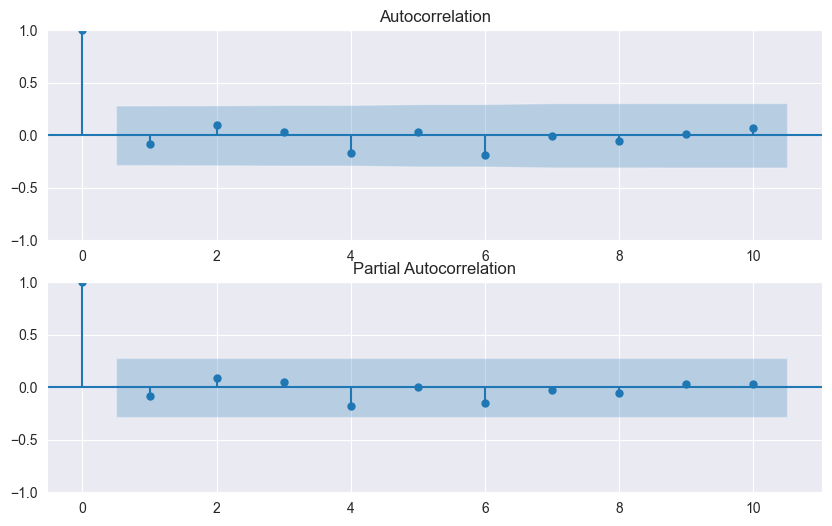

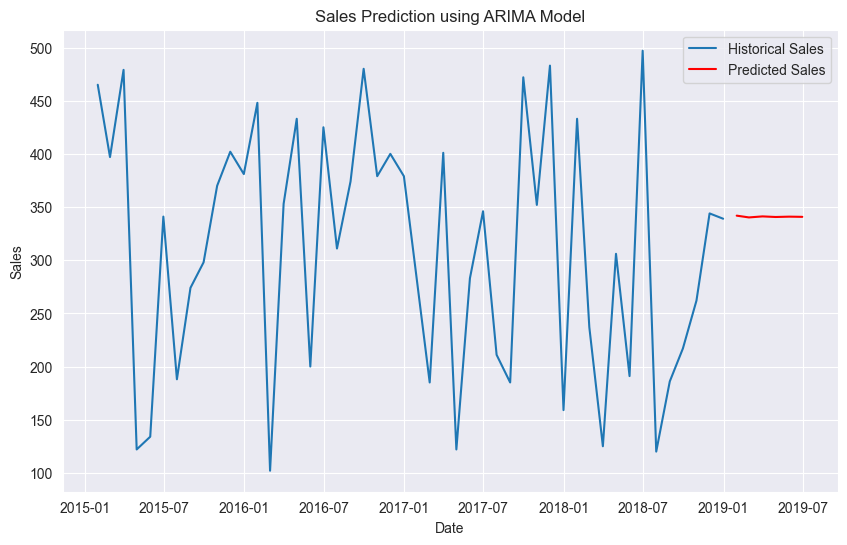

Mean Absolute Error (MAE): 85.06089499000487
Mean Squared Error (MSE): 12015.965601610858
Root Mean Squared Error (RMSE): 109.6173599463646
Mean Absolute Percentage Error (MAPE): 46.316430917438396%


2019-01-31    341.889079
2019-02-28    340.219723
2019-03-31    341.184304
2019-04-30    340.626954
2019-05-31    340.949000
2019-06-30    340.762916
Freq: M, Name: predicted_mean, dtype: float64

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

# Load your sales data
# Replace this with your actual sales data
data = {
    'Order Date': pd.date_range(start='2015-01-01', end='2018-12-31', freq='M'),
    'Sales': np.random.randint(100, 500, size=48)  # Example sales data
}
sales_data = pd.DataFrame(data)

# Set 'Order Date' as the index
sales_data.set_index('Order Date', inplace=True)

# Check for missing values
print(sales_data.isnull().sum())

# Check for stationarity
result = adfuller(sales_data['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# If the series is non-stationary, consider differencing
if result[1] > 0.05:  # Non-stationary
    sales_data['Sales'] = sales_data['Sales'].diff().dropna()

# Determine ARIMA parameters (p, d, q)
# This part can be more complex; you can plot ACF and PACF to help determine p and q
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
sm.graphics.tsa.plot_acf(sales_data['Sales'].dropna(), lags=10, ax=ax[0])
sm.graphics.tsa.plot_pacf(sales_data['Sales'].dropna(), lags=10, ax=ax[1])
plt.show()

# Fit the ARIMA model (adjust p, d, q as needed)
p = 1  
d = 1  
q = 0  
model = ARIMA(sales_data['Sales'].dropna(), order=(p, d, q))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=6)  # Forecast for the next 6 months

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sales_data['Sales'], label='Historical Sales')
plt.plot(pd.date_range(start='2019-01-01', periods=6, freq='M'), predictions, label='Predicted Sales', color='red')
plt.title('Sales Prediction using ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Evaluation metrics (assuming you have actual future sales data for evaluation)
# Replace with your actual future sales data for MAPE calculation
actual_future_sales = np.random.randint(100, 500, size=6)  # Example actual future sales data
mae = np.mean(np.abs(predictions - actual_future_sales))
mse = np.mean((predictions - actual_future_sales) ** 2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((predictions - actual_future_sales) / actual_future_sales)) * 100

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

predictions

In [141]:
# Assuming df_resampled is your DataFrame
df.to_csv('sales_data.csv', index=True) 


# Best Selling Products in 2019

In [144]:
# Assuming 'sales_data' has 'Order Date', 'Product Name', and 'Sales' columns
df['Year'] = df.index.year
df['Month'] = df.index.month

# Aggregate sales data by product, year, and month
product_sales = df.groupby(['Product Name', 'Year', 'Month']).agg({'Sales': 'sum'}).reset_index()


In [147]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Assuming 'product_sales' is already created, and 'Order Date' is the index
# Get unique product names
products = product_sales['Product Name'].unique()

product_forecasts = {}

# Loop through each product
for product in products:
    # Filter data for the specific product
    product_data = product_sales[product_sales['Product Name'] == product]['Sales']
    
    # Skip if the product data is too short for ARIMA modeling
    if len(product_data) < 3:
        print(f"Skipping product {product} due to insufficient data.")
        continue

    # Ensure data is stationary (skip if data is too short for ADF test)
    try:
        result = adfuller(product_data, maxlag=1)  # Reduced maxlag to handle smaller datasets
        if result[1] > 0.05:  # Non-stationary
            product_data = product_data.diff().dropna()
    except ValueError:
        print(f"Skipping ADF test for product {product} due to short data.")
    
    # Fit ARIMA model (adjust p, d, q as needed)
    try:
        model = ARIMA(product_data, order=(1, 1, 0))  # Adjust the order (p, d, q) as needed
        model_fit = model.fit()

        # Forecast sales for 2019 (12 months)
        forecast = model_fit.forecast(steps=12)
        product_forecasts[product] = forecast
    except Exception as e:
        print(f"Error fitting model for product {product}: {e}")

# Now you have the sales forecasts for 2019 for each product


Skipping ADF test for product "While you Were Out" Message Book, One Form per Page due to short data.
Skipping ADF test for product #10 Gummed Flap White Envelopes, 100/Box due to short data.
Skipping ADF test for product #10 Self-Seal White Envelopes due to short data.
Skipping product #10-4 1/8" x 9 1/2" Premium Diagonal Seam Envelopes due to insufficient data.
Skipping ADF test for product #6 3/4 Gummed Flap White Envelopes due to short data.
Skipping product 1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2" X 11" Cards, 25 Env./Pack due to insufficient data.
Skipping ADF test for product 12 Colored Short Pencils due to short data.
Skipping ADF test for product 14-7/8 x 11 Blue Bar Computer Printout Paper due to short data.
Skipping ADF test for product 2300 Heavy-Duty Transfer File Systems by Perma due to short data.
Skipping ADF test for product 24 Capacity Maxi Data Binder Racks, Pearl due to short data.
Skipping ADF test for product 3.6 Cubic Foot Counter Height Off

In [148]:
# Sum the forecasted sales for each product
total_sales_2019 = {product: np.sum(forecast) for product, forecast in product_forecasts.items()}

# Convert to a DataFrame for ranking
forecast_df = pd.DataFrame(list(total_sales_2019.items()), columns=['Product Name', 'Total Sales 2019'])
forecast_df = forecast_df.sort_values(by='Total Sales 2019', ascending=False)

# Show top products
print("Top selling products in 2019:")
print(forecast_df.head())


Top selling products in 2019:
                                           Product Name  Total Sales 2019
1294           Tenex Chairmat w/ Average Lip, 45" x 53"      26159.374402
366   Chromcraft Bull-Nose Wood 48" x 96" Rectangula...      14290.082577
1075     Plantronics Voyager Pro HD - Bluetooth Headset      13355.431208
368   Chromcraft Bull-Nose Wood Round Conference Tab...      12798.269637
139                                      Apple iPhone 5      12002.757696


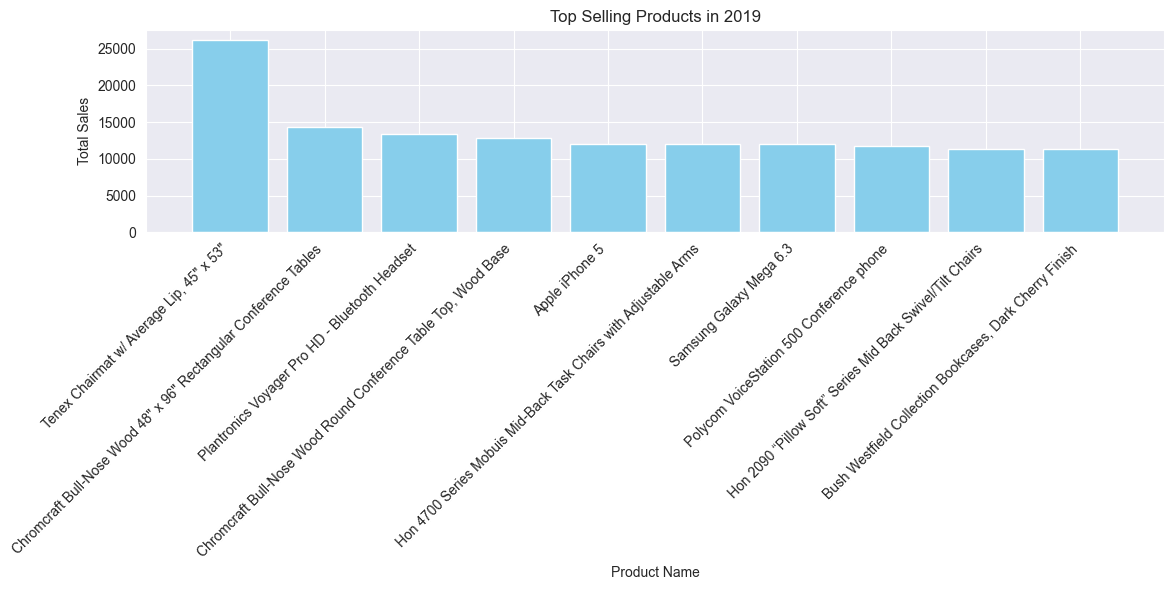

In [149]:
# Plotting the top selling products
plt.figure(figsize=(12, 6))
plt.bar(forecast_df['Product Name'][:10], forecast_df['Total Sales 2019'][:10], color='skyblue')
plt.title('Top Selling Products in 2019')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()